## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.1


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  88.881656   994.312542  0.801638  7.384464  801.973850
1  19.740466   995.474461  0.195487  1.963135  195.689759
2  39.126725   460.262226  0.413208  6.356739  194.069959
3  46.870707  1569.933010  0.092357  7.053940  152.331055
4  22.193258  1377.466813  0.645163  7.308339  889.117311


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9583708	total: 56ms	remaining: 55.9s
1:	learn: 0.9473221	total: 56.6ms	remaining: 28.2s
2:	learn: 0.9362032	total: 57.2ms	remaining: 19s
3:	learn: 0.9251454	total: 57.7ms	remaining: 14.4s
4:	learn: 0.9121999	total: 58.2ms	remaining: 11.6s
5:	learn: 0.8998311	total: 58.6ms	remaining: 9.7s
6:	learn: 0.8876177	total: 59.1ms	remaining: 8.38s
7:	learn: 0.8741214	total: 59.6ms	remaining: 7.38s
8:	learn: 0.8624970	total: 60ms	remaining: 6.61s
9:	learn: 0.8498033	total: 60.5ms	remaining: 5.99s
10:	learn: 0.8386747	total: 61.2ms	remaining: 5.5s
11:	learn: 0.8246517	total: 61.8ms	remaining: 5.09s
12:	learn: 0.8131359	total: 62.5ms	remaining: 4.74s
13:	learn: 0.8021010	total: 63.2ms	remaining: 4.45s
14:	learn: 0.7896886	total: 63.9ms	remaining: 4.19s
15:	learn: 0.7798073	total: 64.5ms	remaining: 3.97s
16:	learn: 0.7686383	total: 65.3ms	remaining: 3.78s
17:	learn: 0.7578400	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7489468	total: 66.3ms	remaining: 3.42s


115:	learn: 0.2384998	total: 113ms	remaining: 863ms
116:	learn: 0.2357677	total: 114ms	remaining: 858ms
117:	learn: 0.2333557	total: 114ms	remaining: 853ms
118:	learn: 0.2309869	total: 115ms	remaining: 850ms
119:	learn: 0.2285427	total: 116ms	remaining: 848ms
120:	learn: 0.2259587	total: 116ms	remaining: 845ms
121:	learn: 0.2232237	total: 117ms	remaining: 843ms
122:	learn: 0.2215411	total: 118ms	remaining: 840ms
123:	learn: 0.2193660	total: 118ms	remaining: 835ms
124:	learn: 0.2176112	total: 119ms	remaining: 832ms
125:	learn: 0.2150941	total: 119ms	remaining: 828ms
126:	learn: 0.2129869	total: 120ms	remaining: 824ms
127:	learn: 0.2111721	total: 120ms	remaining: 819ms
128:	learn: 0.2087943	total: 121ms	remaining: 814ms
129:	learn: 0.2067114	total: 121ms	remaining: 811ms
130:	learn: 0.2047267	total: 122ms	remaining: 806ms
131:	learn: 0.2029335	total: 122ms	remaining: 802ms
132:	learn: 0.2011574	total: 122ms	remaining: 798ms
133:	learn: 0.1991532	total: 123ms	remaining: 794ms
134:	learn: 

267:	learn: 0.0719203	total: 187ms	remaining: 510ms
268:	learn: 0.0713522	total: 187ms	remaining: 509ms
269:	learn: 0.0710961	total: 188ms	remaining: 508ms
270:	learn: 0.0708712	total: 188ms	remaining: 506ms
271:	learn: 0.0703791	total: 189ms	remaining: 505ms
272:	learn: 0.0698609	total: 189ms	remaining: 504ms
273:	learn: 0.0696151	total: 190ms	remaining: 502ms
274:	learn: 0.0692471	total: 190ms	remaining: 501ms
275:	learn: 0.0688979	total: 190ms	remaining: 500ms
276:	learn: 0.0686643	total: 191ms	remaining: 498ms
277:	learn: 0.0683864	total: 191ms	remaining: 497ms
278:	learn: 0.0681606	total: 192ms	remaining: 496ms
279:	learn: 0.0678513	total: 192ms	remaining: 494ms
280:	learn: 0.0675275	total: 192ms	remaining: 492ms
281:	learn: 0.0673576	total: 193ms	remaining: 491ms
282:	learn: 0.0671688	total: 193ms	remaining: 490ms
283:	learn: 0.0668673	total: 194ms	remaining: 488ms
284:	learn: 0.0665779	total: 194ms	remaining: 487ms
285:	learn: 0.0663906	total: 194ms	remaining: 485ms
286:	learn: 

496:	learn: 0.0261549	total: 295ms	remaining: 298ms
497:	learn: 0.0260297	total: 295ms	remaining: 298ms
498:	learn: 0.0259135	total: 296ms	remaining: 297ms
499:	learn: 0.0257988	total: 296ms	remaining: 296ms
500:	learn: 0.0256577	total: 297ms	remaining: 296ms
501:	learn: 0.0255739	total: 297ms	remaining: 295ms
502:	learn: 0.0254622	total: 298ms	remaining: 294ms
503:	learn: 0.0253430	total: 298ms	remaining: 293ms
504:	learn: 0.0251977	total: 299ms	remaining: 293ms
505:	learn: 0.0250707	total: 299ms	remaining: 292ms
506:	learn: 0.0249631	total: 299ms	remaining: 291ms
507:	learn: 0.0248225	total: 300ms	remaining: 290ms
508:	learn: 0.0247150	total: 301ms	remaining: 290ms
509:	learn: 0.0245922	total: 301ms	remaining: 289ms
510:	learn: 0.0244555	total: 302ms	remaining: 289ms
511:	learn: 0.0243217	total: 302ms	remaining: 288ms
512:	learn: 0.0242016	total: 302ms	remaining: 287ms
513:	learn: 0.0240951	total: 303ms	remaining: 286ms
514:	learn: 0.0239782	total: 303ms	remaining: 286ms
515:	learn: 

649:	learn: 0.0143888	total: 369ms	remaining: 199ms
650:	learn: 0.0143210	total: 369ms	remaining: 198ms
651:	learn: 0.0142935	total: 370ms	remaining: 197ms
652:	learn: 0.0142268	total: 370ms	remaining: 197ms
653:	learn: 0.0141705	total: 371ms	remaining: 196ms
654:	learn: 0.0140960	total: 371ms	remaining: 196ms
655:	learn: 0.0140297	total: 372ms	remaining: 195ms
656:	learn: 0.0139574	total: 372ms	remaining: 194ms
657:	learn: 0.0138937	total: 373ms	remaining: 194ms
658:	learn: 0.0138393	total: 374ms	remaining: 193ms
659:	learn: 0.0137723	total: 374ms	remaining: 193ms
660:	learn: 0.0137190	total: 375ms	remaining: 192ms
661:	learn: 0.0136577	total: 376ms	remaining: 192ms
662:	learn: 0.0136055	total: 377ms	remaining: 191ms
663:	learn: 0.0135375	total: 377ms	remaining: 191ms
664:	learn: 0.0134864	total: 378ms	remaining: 190ms
665:	learn: 0.0134273	total: 379ms	remaining: 190ms
666:	learn: 0.0133614	total: 380ms	remaining: 189ms
667:	learn: 0.0133115	total: 380ms	remaining: 189ms
668:	learn: 

839:	learn: 0.0082558	total: 477ms	remaining: 90.9ms
840:	learn: 0.0082187	total: 478ms	remaining: 90.4ms
841:	learn: 0.0081800	total: 478ms	remaining: 89.8ms
842:	learn: 0.0081632	total: 479ms	remaining: 89.2ms
843:	learn: 0.0081281	total: 479ms	remaining: 88.6ms
844:	learn: 0.0081185	total: 480ms	remaining: 88ms
845:	learn: 0.0080879	total: 480ms	remaining: 87.4ms
846:	learn: 0.0080785	total: 481ms	remaining: 86.8ms
847:	learn: 0.0080692	total: 481ms	remaining: 86.2ms
848:	learn: 0.0080390	total: 482ms	remaining: 85.7ms
849:	learn: 0.0080299	total: 482ms	remaining: 85.1ms
850:	learn: 0.0079958	total: 483ms	remaining: 84.5ms
851:	learn: 0.0079846	total: 483ms	remaining: 83.9ms
852:	learn: 0.0079549	total: 483ms	remaining: 83.3ms
853:	learn: 0.0079461	total: 484ms	remaining: 82.7ms
854:	learn: 0.0079375	total: 485ms	remaining: 82.2ms
855:	learn: 0.0079083	total: 487ms	remaining: 81.9ms
856:	learn: 0.0078998	total: 488ms	remaining: 81.4ms
857:	learn: 0.0078897	total: 488ms	remaining: 80

942:	learn: 0.0060839	total: 556ms	remaining: 33.6ms
943:	learn: 0.0060684	total: 556ms	remaining: 33ms
944:	learn: 0.0060432	total: 557ms	remaining: 32.4ms
945:	learn: 0.0060270	total: 558ms	remaining: 31.8ms
946:	learn: 0.0059980	total: 558ms	remaining: 31.2ms
947:	learn: 0.0059926	total: 559ms	remaining: 30.6ms
948:	learn: 0.0059701	total: 559ms	remaining: 30ms
949:	learn: 0.0059551	total: 559ms	remaining: 29.4ms
950:	learn: 0.0059498	total: 560ms	remaining: 28.9ms
951:	learn: 0.0059303	total: 561ms	remaining: 28.3ms
952:	learn: 0.0059251	total: 561ms	remaining: 27.7ms
953:	learn: 0.0059092	total: 562ms	remaining: 27.1ms
954:	learn: 0.0058900	total: 562ms	remaining: 26.5ms
955:	learn: 0.0058685	total: 563ms	remaining: 25.9ms
956:	learn: 0.0058634	total: 564ms	remaining: 25.3ms
957:	learn: 0.0058479	total: 564ms	remaining: 24.7ms
958:	learn: 0.0058293	total: 564ms	remaining: 24.1ms
959:	learn: 0.0058242	total: 565ms	remaining: 23.5ms
960:	learn: 0.0058192	total: 565ms	remaining: 22.9

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


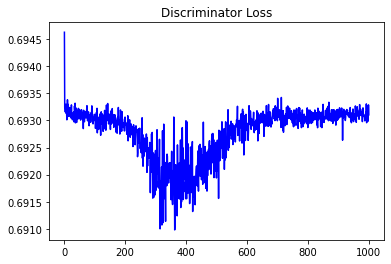

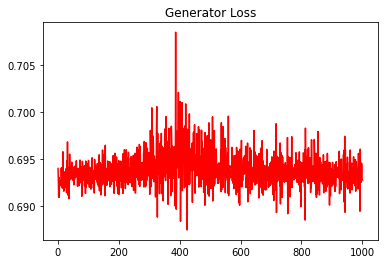

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.008890973357198548


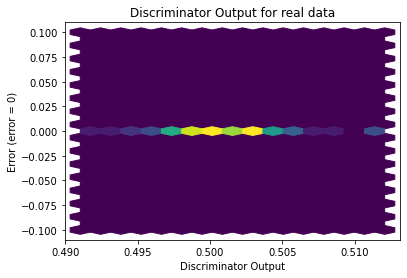

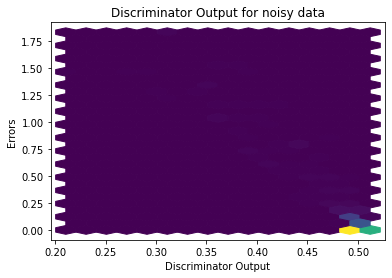

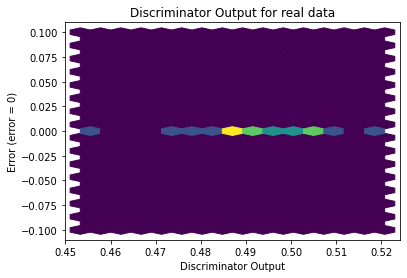

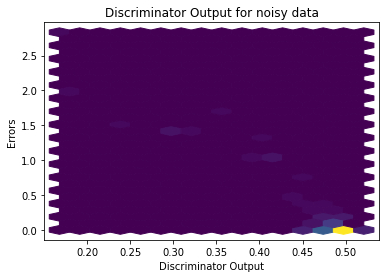

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1109]], requires_grad=True)
